<h1>Régression</h1>

<h2>Import des librairies</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<h2>Import des données</h2>

In [2]:
# Charger les données du jeu de données
data = pd.read_csv("cars_data-reg.csv")

# Afficher les 5 premières lignes des données (avoir une idée du jeu de données via un premier aperçu)
data.head()

,Kilométrage,Année_Fabrication,Puissance,Consommation,Nombre_Portes,Vitesse_Max,Marque,Prix
0,89517,2008,210,82.094399,2,219,1,22902.765158
1,97836,2018,274,16.331939,3,291,1,29512.466062
2,50396,2011,133,29.778738,2,231,2,13029.153685
3,143982,2012,243,41.556940,3,238,1,27292.752562
4,224514,2021,326,87.855383,5,281,2,46817.128341


<h2>Visualisation des données</h2>

In [3]:
data.describe() 

,Kilométrage,Année_Fabrication,Puissance,Consommation,Nombre_Portes,Vitesse_Max,Marque,Prix
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,146302.3380,2011.32600,235.010000,53.614884,3.514000,225.039000,2.000000,32355.779868
std,86102.8942,6.87772,64.058218,27.336137,1.159806,43.022953,0.811578,10368.675552
min,728.0000,2000.00000,125.000000,5.353732,2.000000,150.000000,1.000000,5666.794333
25%,70326.0000,2005.00000,181.000000,29.955260,2.000000,188.000000,1.000000,24671.936893
50%,143958.5000,2011.00000,237.000000,53.356480,4.000000,226.000000,2.000000,32058.370765
75%,223790.2500,2017.00000,288.000000,77.950275,5.000000,262.000000,3.000000,39789.299440
max,299790.0000,2023.00000,349.000000,99.979611,5.000000,300.000000,3.000000,59640.769068


Ici nous regardons les informations sur nos données, nous vérifions les différentes colonnes, si tout semble bon. Via la fonction describe, on récupère des informations sur notre jeu de données qui sont pertinentes correctement découvrir ce dernier.

<h2>Vérifications des données</h2>

Nous allons maintenant vérifier l'intégrité de nos données pour voir si tout est bon. Pour cela on va vérifier les types de données, les données manquantes (si certaines manquent on va les remplacer par la moyenne), vérfier les potentielles améliorations...

<Axes: >

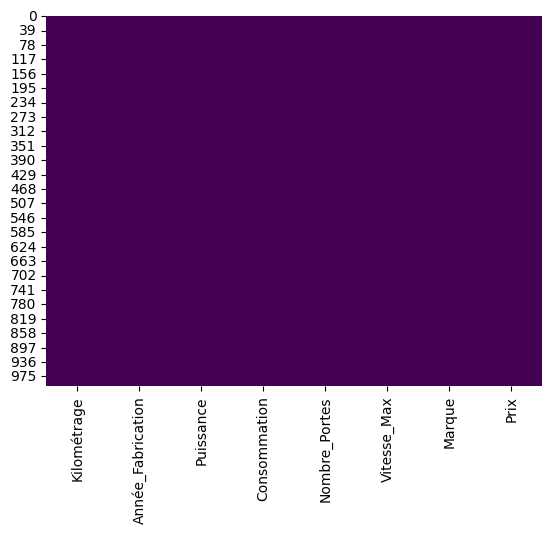

In [4]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)

Nous remarquons dans cette étape que le jeu de données est directement exploitable, qu'aucune donnée est manquante.

<h1>Corrélation des variables</h1>

<h2>Création de la matrice</h2>

 Nous allons maintenant afficher une matrice de corrélation permettant de visualiser quelles variables sont corélées entre elles. Cela nous est très pratique sachant que nous nous intéressons à celles qui corélles avec le prix.

<Axes: >

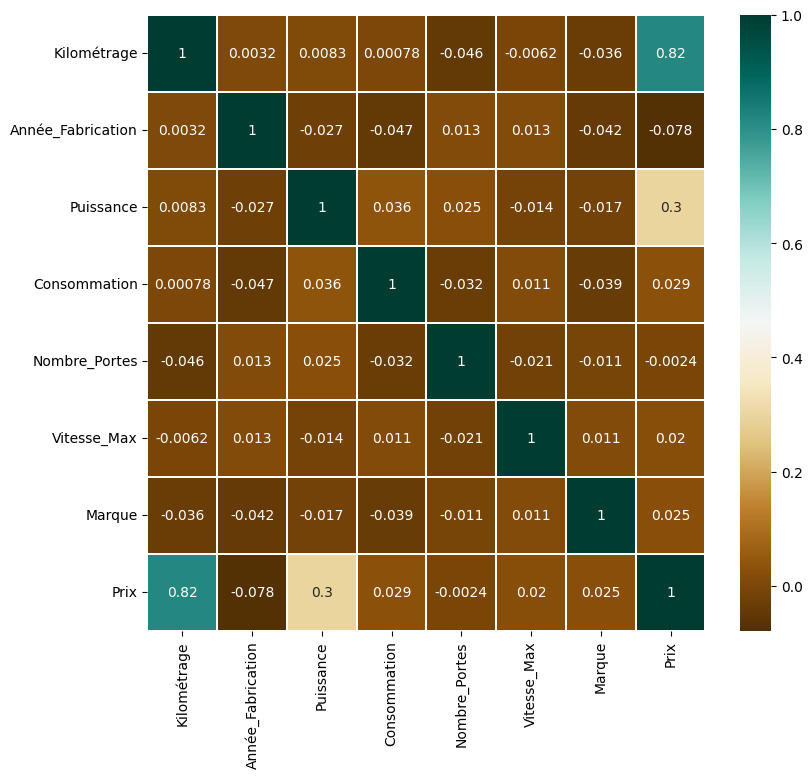

In [5]:
corr_matrix = data.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 8))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)

<h2>Analyse de la matrice de corrélation</h2>

On a généré une matrice de corrélation pour visualiser les relations entre les différentes caractéristiques de nos données. On a fait le choix d utiliser la librairie Seaborn pour faciliter l affichage tout en paramètrant le rendu. cela nous permet de mieux voirs les corrélations. 

Selon notre matrice, nous pouvons voir qu'il y a une forte corrélation positive entre le <strong>Kilométrage</strong> et le prix. Nous remarquons également que la deuxième variable qui corrèle le plus avec le prix est la <strong>puissance</strong>

<li><strong>Kilométrage :</strong> Plus une voiture a de kilomètres, plus on peut s'attendre à ce que sa valeur diminue, car cela peut être un indicateur de l'usure générale et de la proximité de la nécessité de remplacer des pièces.</li>

<li><strong>Puissance :</strong> Les voitures avec plus de puissance sont souvent perçues comme plus désirables ou performantes et peuvent donc coûter plus cher.</li>

<h2>Visualisation graphique du prix en fonction du kilométrage suite à la corrélation</h2>

Suite à la création de la matrice de corrélation nous obtenons une forte corrélation entre le kilométrage et le prix, on pourrait s'attendre à une corrélation entre un nombre de kilométrage élevé et un faible prix.

Text(0, 0.5, 'Prix')

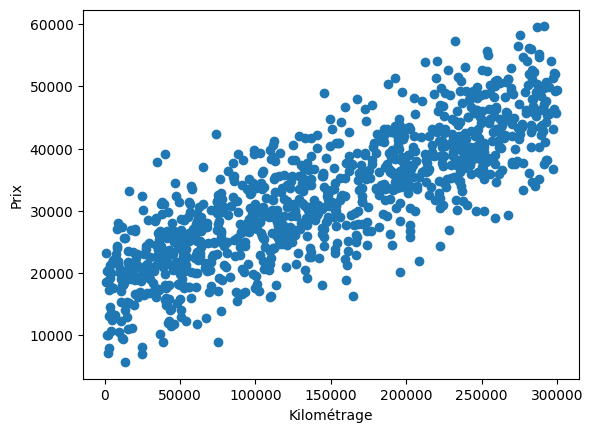

In [6]:
plt.scatter(data['Kilométrage'], data['Prix'], label='Données')
plt.xlabel('Kilométrage')  # Label pour l'axe X sur notre graph
plt.ylabel('Prix')         # Label pour l'axe Y sur notre graph

D'après le graphe ci-dessus nous remarquons que la corrélation entre le prix et le kilométrage est bien fondée, cependant pas dans le sens où l'on pourrait si attendre. En effet, plus le kilométrage est grand plus le prix l'est aussi cependant cela n'est pas logique. Or mis cela le kilométrage reste la meilleure variable de ce jeu de données pour expliquer le prix d'une voiture dans le jeu de données.

<h2>Visualisation graphique du prix en fonction du Puissance suite à la corrélation</h2>

Suite à la création de la matrice de corrélation nous obtenons une corrélation entre la puissance et le prix, on pourrait s'attendre à une corrélation entre la puissance élevé voiture et un prix élevé.

Text(0, 0.5, 'Prix')

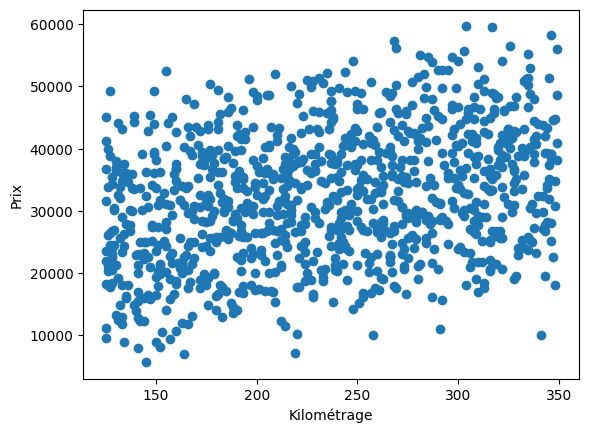

In [7]:
plt.scatter(data['Puissance'], data['Prix'], label='Données')
plt.xlabel('Kilométrage')  # Label pour l'axe X sur notre graph
plt.ylabel('Prix')         # Label pour l'axe Y sur notre graph

D'après le graphe ci-dessus nous remarquons que la corrélation suit bien la forme attendue plus la voiture plus le prix et élevée en moyenne, cependant la corrélation entre le prix et la puissance reste bien inférieure au kilométrage.

<h1>Impact individuel d'une variable</h1>

<h2>Régression linéaire simple</h2>

Nous allons réaliser une régression linéaire simple car l'analyse individuelle de chaque variable avec le prix nous aide à comprendre leur impact individuel.

In [8]:
y = data['Prix']
Colonnes = ['Kilométrage', 'Année_Fabrication', 'Puissance', 'Consommation', 'Nombre_Portes', 'Vitesse_Max', 'Marque']

i = 1
for c in Colonnes:
    print('----------------------------------------------------------------------------------------------------\n')
    print('Modèle n°', i)
    X = data[c]
    a, b, r, p, _ = stats.linregress(X, y)
    print('Prix = ', a, '*', c, '+', b)
    R2 = r ** 2
    print('      R^2 = ', R2)
    print('          ==> {:2.2%} de la variabilité du prix est expliquée par {}'.format(R2, X.name))
    print('      On teste l\'hypothèse H0 : beta_1 = 0 au risque alpha = 5%')
    print('      p_value = ', p)
    if p < .05 :
        print('On rejette H0 au risque 5%')
        print(c, ' a bien un impact sur le prix')
    else:
        print('On accepte H0')
    print('\n')

----------------------------------------------------------------------------------------------------

Modèle n° 1
Prix =  0.09837917335677195 * Kilométrage + 17962.676795228777
      R^2 =  0.6674139307886546
          ==> 66.74% de la variabilité du prix est expliquée par Kilométrage
      On teste l'hypothèse H0 : beta_1 = 0 au risque alpha = 5%
      p_value =  8.317164806671154e-241
On rejette H0 au risque 5%
Kilométrage  a bien un impact sur le prix


----------------------------------------------------------------------------------------------------

Modèle n° 1
Prix =  -117.94566113801031 * Année_Fabrication + 269582.95470190153
      R^2 =  0.006120773394306176
          ==> 0.61% de la variabilité du prix est expliquée par Année_Fabrication
      On teste l'hypothèse H0 : beta_1 = 0 au risque alpha = 5%
      p_value =  0.013334093838274374
On rejette H0 au risque 5%
Année_Fabrication  a bien un impact sur le prix


-------------------------------------------------------------

Ces résultats de régression linéaire simple montrent des degrés variés de corrélation entre différents facteurs (Kilométrage, Année de Fabrication, Puissance, Consommation, Nombre de Portes, Vitesse Maximale, Marque) et le prix d'un véhicule. Voici une conclusion pour chaque modèle :

<strong>Kilométrage et Prix :</strong> Avec un R2 de 66.74%, le kilométrage a une forte corrélation avec le prix. Plus le kilométrage est élevé, plus le prix augmente. Le rejet de l'hypothèse nulle (H0) confirme cette influence significative.

<strong>Année de Fabrication et Prix :</strong> Bien que l'Année de Fabrication ait un impact statistiquement significatif sur le prix (rejet de H0), la faible valeur de R2 (0.61%) suggère que cette variable explique très peu la variabilité du prix.

<strong>Puissance et Prix :</strong> La puissance montre une corrélation positive modérée avec le prix (9.02% de variabilité expliquée). Le rejet de H0 indique une relation significative, bien que pas très forte.

<strong>Consommation et Prix :</strong> Avec un R2 extrêmement bas (0.09%) et l'acceptation de H0, on conclut que la consommation n'a pas d'impact significatif sur le prix.

<strong>Nombre de Portes et Prix :</strong> Cette variable présente une corrélation quasi nulle avec le prix (0.00% de variabilité expliquée) et accepte H0, indiquant aucune influence significative.

<strong>Vitesse Maximale et Prix :</strong> Semblable à la consommation et au nombre de portes, la vitesse maximale a très peu d'effet sur le prix (0.04% de variabilité expliquée), avec une acceptation de H0.

<strong>Marque et Prix :</strong> La marque a un impact très limité sur le prix (0.06% de variabilité expliquée) et n'est pas statistiquement significative (acceptation de H0).

En résumé, sur les facteurs examinés, le kilométrage et dans une moindre mesure la puissance sont les seuls à avoir un impact significatif sur le prix d'un véhicule. Les autres facteurs, bien que statistiquement significatifs dans certains cas, contribuent peu à expliquer les variations de prix. 

<h1>Régression sur le prix d'une voiture</h1>

<h2>Régression linéaire multiple (toutes les colonnes)</h2>

L'évaluation de la régression linéaire multiple avec toutes les colonnes nous fournit un aperçu global de la relation entre les variables et le prix:

In [9]:
import statsmodels.api as sm

X = data[['Kilométrage', 'Année_Fabrication', 'Puissance', 'Consommation', 'Nombre_Portes', 'Vitesse_Max', 'Marque']]  # Variables explicatives
y = data['Prix']  # Variable cible

# Ajout d' une colonne constante à X pour le terme d'intercept
X = sm.add_constant(X)

# on construit le modele
model = sm.OLS(y, X)
result = model.fit()

# Afficher le résumé des résultats du modèle
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Prix   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     459.1
Date:                Fri, 05 Jan 2024   Prob (F-statistic):          5.81e-306
Time:                        19:26:33   Log-Likelihood:                -9942.7
No. Observations:                1000   AIC:                         1.990e+04
Df Residuals:                     992   BIC:                         1.994e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               2.16e+05   4.69e+04      4.602      0.000    1.24e+05    3.08e+05
Kilométrage           0.0986      0.002     52.980      0.000       0.095       0.102
Année_Fabrication  -106.1488     23.306     -4.555      0.000    -151.883     -60.414
Puissance            47.1998      2.500     18.881      0.000      42.294      52.105
Consommation          6.8018      5.867      1.159      0.247      -4.711      18.315
Nombre_Portes       275.0699    138.170      1.991      0.047       3.931     546.209
Vitesse_Max           7.1404      3.718      1.920      0.055      -0.156      14.437
Marque              727.7492    197.524      3.684      0.000     340.137    1115.361
==============================================================================
Omnibus:                        2.365   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.307   Jarque-Bera (JB):                2.233
Skew:                          -0.108   Prob(JB):                        0.327
Kurtosis:                       3.082   Cond. No.                     4.98e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

lorsque l'on analyse les résultats nous obtenons ceci : 
- <strong>R2 et r2 ajusté:</strong> Avec un R2 de 0.764 et un R2 ajusté de 0.762, ce modèle explique environ 76.4% de la variabilité du prix, ce qui est assez élevé et indique une bonne adéquation du modèle. Le R1 ajusté est légèrement inférieur pour tenir compte du nombre de variables dans le modèle.


- <strong>F-statistique</strong> : La F-statistique élevée (459.1) et la très faible probabilité associée (5.81e-306) suggèrent que le modèle dans son ensemble est statistiquement significatif.

- <strong>coef :</strong> Les coefficients indiquent l'effet estimé de chaque variable sur le prix. Par exemple, chaque unité supplémentaire de kilométrage augmente le prix de 0.0986 unités, tandis que chaque année supplémentaire depuis l'année de fabrication réduit le prix de 106.15 unités.
  

- <strong> p valeur :</strong> Des valeurs inférieures à 0.05 indiquent généralement une significativité statistique. Ici, Kilométrage, Année de Fabrication, Puissance, et Marque sont significatives. Consommation, Nombre de Portes, et Vitesse Maximale ont des valeurs p plus élevées, suggérant une moindre significativité.


- <strong>Intervalle de confiance :</strong> Cet intervalle indique où se situent vraisemblablement les vrais coefficients. Par exemple, le véritable impact de la puissance sur le prix est probablement entre 42.294 et 52.105.


- <strong>Tests :</strong> Ces tests mesurent la qualité des résidus (différence entre les valeurs observées et prédites). Un DW proche de 2 suggère une absence d'auto-corrélation des résidus, ce qui est bon.


En conclusion, ce modèle semble dans un premier temps assez robuste pour prédire le prix des véhiculen Il est important de noter que le modèle a été construit sur un unique jeu de données sans validation croisée ou test sur un ensemble de données séparé, ce qui affecte sa généralisabilité. Pour améliorer le modèle, on pourrait envisager d'utiliser un ensemble de données de test et de réduire le nombre de variables. C'est ce que nous allons faire dans la deuxième partie car nous ne pouvons en effet pas nous baser sur cette première approche..t pertinentes.

# Régression linéaire améliorée
## Préparation des données
- Nous pouvons supprimer les colonnes inutiles que nous avons réussi à identifié plus haut. Nous allons nous concentrer sur 2 colonnes qui impactent le prix, en l'occurence les données de Kilométrage et de Puissance.

In [10]:
data = data.drop(columns=['Année_Fabrication','Consommation', 'Nombre_Portes','Vitesse_Max', 'Marque'])

In [11]:
data.head()

,Kilométrage,Puissance,Prix
0,89517,210,22902.765158
1,97836,274,29512.466062
2,50396,133,13029.153685
3,143982,243,27292.752562
4,224514,326,46817.128341


On fait un petit affichage pour voir si nos colonnes sont bien supprimées

In [12]:
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import train_test_split

X = data[['Kilométrage', 'Puissance']]  # Variables explicatives
y = data['Prix']  # Variable cible

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


test_size=0.2 signifie que 20% du jeu de données sera utilisé comme ensemble de test, tandis que les 80% restants constitueront l'ensemble d'entraînement.

## Entraînement et Résumé du Modèle
Entraînement du modèle sur l'ensemble d'entraînement et affichage du résumé.

In [13]:
# Ajout d'une constante à X_train pour le terme d'intercept
X_train_with_const = sm.add_constant(X_train)

# Entraînement du modèle
model = OLS(y_train, X_train_with_const)
report = model.fit()

# Affichage du résumé du modèle
report.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Prix   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     1173.
Date:                Fri, 05 Jan 2024   Prob (F-statistic):          3.42e-238
Time:                        19:26:33   Log-Likelihood:                -7981.8
No. Observations:                 800   AIC:                         1.597e+04
Df Residuals:                     797   BIC:                         1.598e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6968.0552    756.034      9.217      0.000    5484.002    8452.108
Kilométrage     0.0961      0.002     44.705      0.000       0.092       0.100
Puissance      48.0147      2.856     16.811      0.000      42.408      53.621
==============================================================================
Omnibus:                        1.234   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.540   Jarque-Bera (JB):                1.164
Skew:                          -0.093   Prob(JB):                        0.559
Kurtosis:                       3.025   Cond. No.                     7.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Comme précédement analysé, le résummé est plutot intéressant et pousse à penser que notre modèle est performant et pertinent. Nous allons un peu plus rentrer dans des vérifications par la suite comme prévu.
- R2 : 0.746 indique que le modèle explique environ 74.6% de la variabilité du prix des voitures. C'est une valeur assez élevée, ce qui est bon.


- Adjusted R2 : Il est aussi élevé (0.746), ce qui confirme que le modèle est bien ajusté par rapport au nombre de prédicteurs utilisés.

- F-statistic et Prob : La valeur F est très élevée et la probabilité associée est extrêmement faible, indiquant que le modèle est statistiquement significatif.


- Coefficients : Les valeurs des coefficients pour Kilométrage et Puissanc sont positives, ce qui signifie que ces variables sont positivement corrélées avec le prix des voitures. 

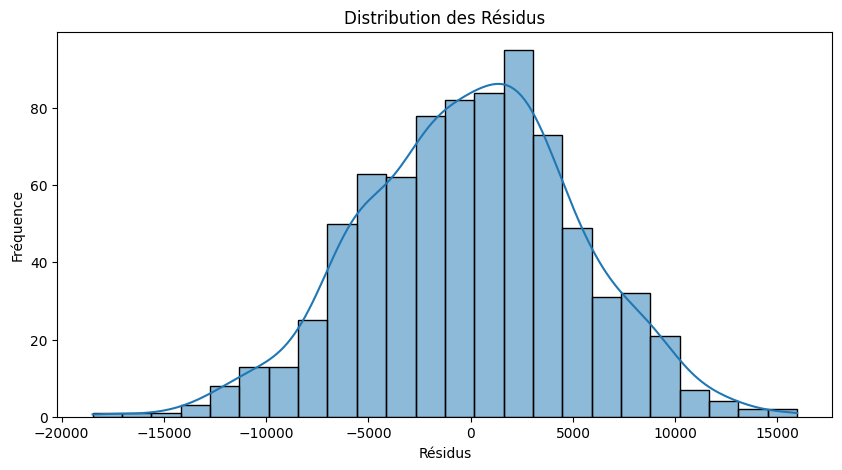

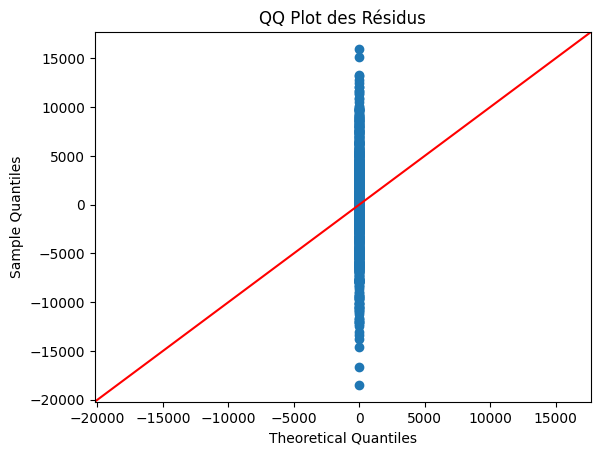

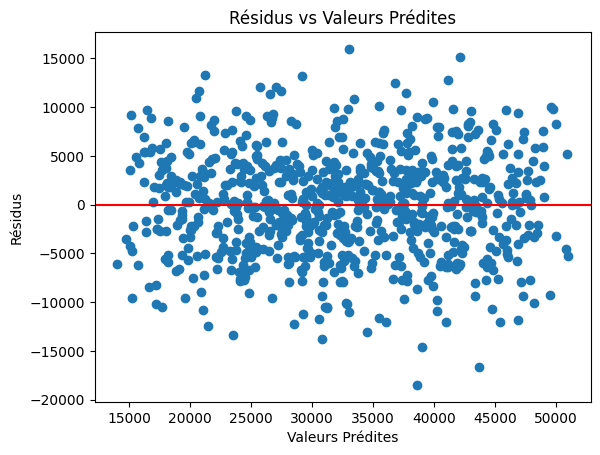

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Calcul des résidus
residuals = report.resid

# Graphique pour la Normalité des Résidus
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title('Distribution des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# QQ plot pour la Normalité des Résidus
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot des Résidus')
plt.show()

# Graphique des Résidus vs Valeurs Prédites pour vérifier l'Homoscédasticitéee
plt.scatter(report.predict(X_train_with_const), residuals)
plt.title('Résidus vs Valeurs Prédites')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Résidus')
plt.axhline(y=0, color='r')
plt.show()


## Interprétation des Graphiques
- <strong>Distribution des Résidus:</strong> Semble être centrée autour de zéro et forme une courbe en cloche, ce qui est un bon signe. Toutefois, on note une légère asymétrie vers la droite, indiquant une distribution des erreurs légèrement biaisée.

 
- <strong>QQ plot des residus:</strong>Les points dans le QQ ne suivent pas strictement la ligne aux extrémités, ce qui suggère des écarts par rapport à la normalité.

  
- <strong>Résidus vs Valeurs Prédites:</strong>Le nuage de points n'affiche pas de motif distinct ou de structure en forme d'entonnoir, ce qui indique que l'homoscédasticité n'est pas 
 violée. davantage.

## Evaluation du Modèle sur l'Ensemble de Test

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Prédictions sur l'ensemblew de test
X_test_with_const = sm.add_constant(X_test)
y_pred = report.predict(X_test_with_const)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'HOHOHO LE r2: {r2}')

MSE: 23896767.933144864
HOHOHO LE r2: 0.779773218436564


- <strong>MSE </strong>: LeMSE est assez élevé


- <strong>R2</strong> sur l'ensemble de test : 0.779 indique que le modèle prédit bien sur l'ensemble de test, expliquant environ 77.97% de la variabilité..

# Conclusion

On a un modele qui a su démontré une capacité robuste a expliquer la variabilité des prix en suggérant que les variables choisies sont pertinentes et que les données du modèle ne reflette pas la réalité du marché automobile de par la corréalation positive entre le prix et le kilométrage. Les tests statistiques ont renforcé la confiance dans la validité du modèle. Toutefois même s'il est performant notre modèle et que l'on pensons qu'il convient largement aux attentes, il y a des éléments qui peuvent être approfondis et ont la vu avec nos quelques tests. On pourrait de se fait affiner notre modèle. 

<h1>Classification des voitures</h1>

Nous allons maintenant réaliser grâce à un réseau de neurones et à un modèle de machine Learning la classification des voitures en fonction de leurs impacts sur l'environnement.

<h2>Import des données et traitements</h2>

Comme pour la régression nous réalisation les mêmes opérations sur les données, head et describe mais également seaborn afin de visualiser la donnée et d'avoir des informations utiles.

In [16]:
import pandas as pa
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats as st
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [17]:
df = pa.read_csv('cars_data-class.csv', delimiter = ',')
df.head()

,Taille_Auto,Poids_Auto,Acceleration,Annee_Fabrication,Kilometrage,Nombre_Portes,Vitesse_Max,Prix_Assurance,Categorie_Voiture,Decote,Impact_Environnement
0,3.790317,8869.946374,2.038688,2006,135542.067972,5,195.289066,184.125577,1,0.104588,1
1,3.375892,1126.174079,2.067411,2010,33710.551662,5,249.979656,858.935088,3,0.346064,1
2,4.844971,6100.019066,4.839676,2016,112977.279109,5,235.763320,302.138838,4,0.394582,3
3,2.316172,5771.509867,1.202574,2014,50139.727635,4,216.802020,1298.671966,5,0.422048,2
4,2.618825,5676.666211,5.470806,2009,191188.750210,4,234.004505,702.626517,2,0.279959,1


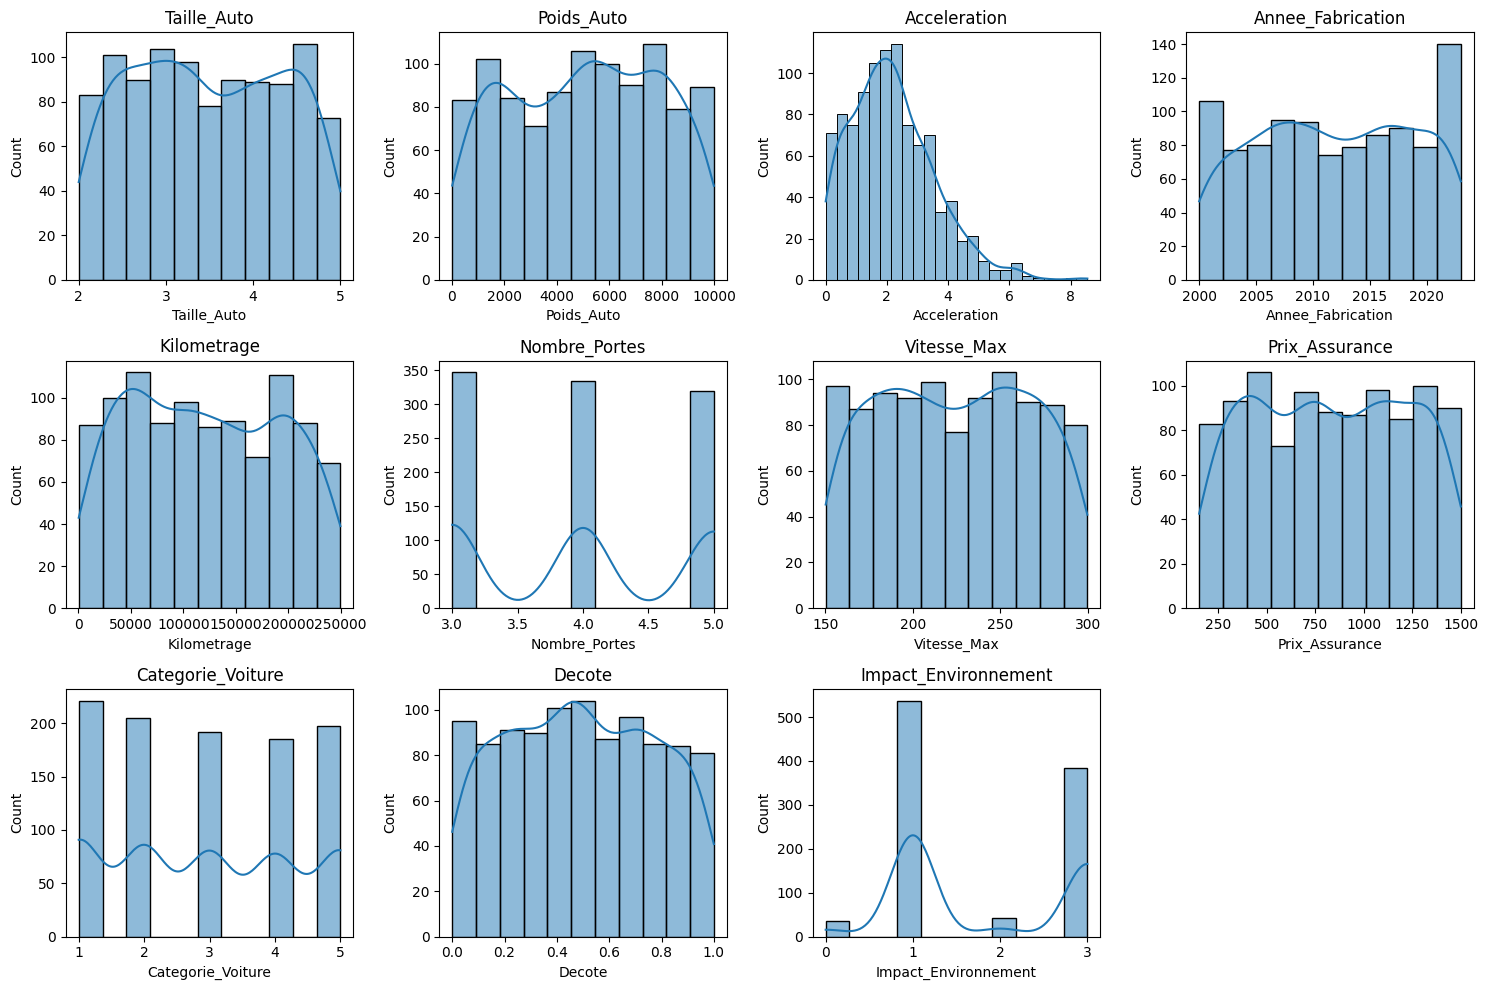

(       Taille_Auto   Poids_Auto  Acceleration  Annee_Fabrication  \
 count  1000.000000  1000.000000   1000.000000          1000.0000   
 mean      3.479775  5044.850996      2.170729          2011.8710   
 std       0.859410  2849.466550      1.362894             6.8648   
 min       2.000248    12.450710      0.003240          2000.0000   
 25%       2.734722  2490.653210      1.186547          2006.0000   
 50%       3.420568  5162.859445      2.037289          2012.0000   
 75%       4.235560  7536.759725      2.970143          2018.0000   
 max       4.999901  9978.901066      8.544301          2023.0000   
 
          Kilometrage  Nombre_Portes  Vitesse_Max  Prix_Assurance  \
 count    1000.000000    1000.000000  1000.000000     1000.000000   
 mean   121206.215162       3.972000   224.233600      829.568881   
 std     71007.199762       0.816016    42.730209      389.904613   
 min       284.195313       3.000000   150.200545      150.718398   
 25%     59215.213085       3.00

In [18]:
# Analyse exploratoire des données
# Affichage des statistiques descriptives
desc_stats = df.describe()

# Recherche de valeurs manquantes
missing_values = df.isnull().sum()

sns.histplot(df['Impact_Environnement'], kde=True)
plt.title('Impact_Environnement')
plt.show()

(desc_stats, missing_values)

Comme l'on peut remarquer dans l'affichage ci-dessus nous avons comme Impact_Environnement un min a 0 et un max a 3, nous permettant ainsi de découpé en 4 classes les voitures présentes dans le jeu de données.

<h2>Préparation et normalisation des données pour la classification de l'impact environnemental des voitures</h2>

In [19]:
# Séparation des caractéristiques et de la variable cible
X = df.drop('Impact_Environnement', axis=1)
y = df['Impact_Environnement']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

((800, 10), (200, 10), (800,), (200,))

Le résultat de la préparation de vos données pour la modélisation montre que :

X_train_scaled et X_test_scaled : Ces deux ensembles sont les caractéristiques  de votre jeu de données qui ont été normalisées. La normalisation est importante pour de nombreux algorithmes de machine learning car elle permet de mettre toutes les caractéristiques à la même échelle, ce qui peut améliorer les performances du modèle. Il y a  800 observations dans l'ensemble d'entraînement et 200 dans l'ensemble de test, avec 10 caractéristiques  dans chaque observation.

y_train et y_test : Ces ensembles contiennent la variable cible Impact_Environnement pour l'ensemble d'entraînement et l'ensemble de test, respectivement. Il y a également 800 observations dans l'ensemble d'entraînement et 200 dans l'ensemble de test.

<h2>Classification grâce à une modèle de Machine learning</h2>

Nous utilisons le modèle Random Forest car il offre une précision élevée et une bonne capacité de généralisation, en combinant les prédictions de multiples arbres de décision, ce qui réduit le risque de surajustement tout en traitant efficacement les ensembles de données complexes et hétérogènes.

In [20]:
# Entraînement du modèle Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Évaluation du Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

(accuracy_rf, conf_matrix_rf)

(0.875,
 array([[  0,   6,   0,   2],
        [  0, 108,   0,   1],
        [  1,   5,   1,   0],
        [  1,   9,   0,  66]], dtype=int64))

L'utilisation du modèle Random Forest pour la classification des voitures selon leur impact environnemental a résulté en un taux de précision de 0.875.

Analyse de la matrice de confusion :

Classe 0 et Classe 2 : Le modèle a du mal à prédire correctement les voitures de ces classes. Pour la Classe 0, toutes les prédictions sont incorrectes. Pour la Classe 2, seulement 1 voiture est correctement classée.

Classe 1 et Classe 3 : Le modèle performe mieux pour ces classes, avec une majorité de voitures correctement classées (108 pour la Classe 1 et 66 pour la Classe 3).

<h2>Classification grâce à un réseau de neurone</h2>

Nous choisissons d'utiliser un réseau de neurones pour sa capacité à capturer des relations complexes et non linéaires dans les données. Ce modèle spécifique, composé de couches denses avec des activations 'relu' et une couche finale 'softmax' pour la classification en 4 classes, a été optimisé avec l'algorithme 'adam' et entraîné sur un ensemble de données équilibré. Sa performance, évaluée sur l'ensemble de test, a montré une précision notable, indiquant son efficacité dans la prédiction des classes cibles. Poruquoi avoir choisi l'optimizer "Adam". 
L'algorithme Adam (Adaptive Moment Estimation) est une méthode d'optimisation utilisée dans l'entraînement des réseaux de neurones. Il combine les meilleures propriétés des algorithmes de descente de gradient adaptatif, comme RMSprop, et de la descente de gradient avec moment. Adam ajuste le taux d'apprentissage pour chaque paramètre individuellement en calculant des estimations adaptatives des premiers et seconds moments des gradients. En pratique, cela signifie qu'il adapte le taux d'apprentissage en fonction de l'historique des gradients, permettant des ajustements plus fins et souvent conduisant à une convergence plus rapide et à de meilleures performances par rapport aux méthodes traditionnelles de descente de gradient.

In [25]:
# Construction du modèle de réseau de neurones
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes pour la variable cible
])

# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

# Évaluation du modèle sur l'ensemble de test
loss, accuracy_nn = model.evaluate(X_test_scaled, y_test, verbose=0)

print("Précision du réseau de neurones :", accuracy_nn)

Précision du réseau de neurones : 0.8299999833106995


Le réseau de neurones a atteint une précision d'environ 80% avec 100 epochs, si on augmente le nombre d'epochs par 10, nous obtenons une précision d'environ 82%.

<h2>Conclusion</h2>

En comparant les performances des deux modèles, nous observons que le Random Forest a démontré une précision notable de 87.5%, suggérant une forte capacité à classer correctement les voitures selon leur impact sur l'environnement. D'autre part, le réseau de neurones, avec sa structure complexe de couches denses, a atteint une précision de 79.5% dans la classification multiclasse, ce qui est également bien mais inférieur au Random Forest. Ces résultats soulignent l'efficacité des deux approches dans le traitement de tâches de classification, tout en mettant en évidence les nuances de performance qui peuvent être attribuées à leurs différences structurelles et algorithmiques. Il est à noter qu'il est possible d'augmenter les résultats du réseau de neurones en augmentant le nombre d'epochs, cependant même après augmentation les résultats n'atteignent pas le niveau du Random Forest. 